In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [187]:
def set_plot_params(fontsize=11):
    sns.set_style("whitegrid", {'grid.linestyle': '--'})
    plt.rc('xtick', labelsize=fontsize)
    plt.rc('ytick', labelsize=fontsize)
    plt.rc('axes', labelsize=fontsize)
    params = {'legend.fontsize': fontsize}
    plt.rcParams.update(params)
    
set_plot_params(fontsize=15)

In [188]:
n_beds = 300

def n_hosps(hosp_rt, pos_rt, ds):
    pop = 888000
    return hosp_rt * (ds * (pos_rt * pop))

def pos_rt(hosp_rt, ds, n_hosps):
    pop = 888000
    return (1/(ds*pop) * (n_hosps/hosp_rt))

def hosp_rt(pos_rt, ds, n_hosps):
    pop = 888000
    return n_hosps / (ds * (pos_rt * pop))

def n_cases(pos_rt, ds):
    pop = 888000
    return (ds * (pos_rt * pop))

In [250]:
poss = list(np.arange(0.004, 0.04, 0.0001))
hospss = [hosp_rt(p, 1, 300) for p in poss]
hospss1 = [hosp_rt(p, 1, 400) for p in poss]
hospss2 = [hosp_rt(p, 1, 600) for p in poss]

In [251]:
import pandas as pd
from itertools import repeat
d = pd.DataFrame({"pos_rt" : poss + poss + poss, 
                  "hosps" : hospss + hospss1 + hospss2, 
                  "n_beds": (list(repeat(300, len(hospss))) + 
                             list(repeat(400, len(hospss))) + 
                             list(repeat(600, len(hospss))))
                 })

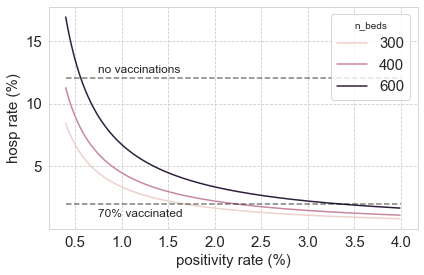

In [292]:
ax = plt.subplot(1, 1, 1)
sns.lineplot(data=d, x="pos_rt", y="hosps", hue="n_beds", ax=ax)
ax.set_xlabel("positivity rate (%)")
ax.set_ylabel("hosp rate (%)")
ax.set_xticks(np.arange(0.005, 0.04, 0.005))
ax.set_xticklabels(['{:.1f}'.format(p*100) for p in np.arange(0.005, 0.04, 0.005)])
ax.set_yticks(np.arange(0.0, 0.25, 0.05))
ax.set_yticklabels(['{:.0f}'.format(p*100) for p in np.arange(0.0, 0.25, 0.05)])
plt.tight_layout()
plt.legend(title="n_beds", loc='upper right')
ax.plot([0.004, 0.04], [0.12, 0.12], '--', c="black", alpha=0.5)
ax.plot([0.004, 0.04], [0.02, 0.02], '--', c="black", alpha=0.5)
plt.text(0.0075, 0.125, "no vaccinations", fontsize='large')
plt.text(0.0075, 0.01, "70% vaccinated", fontsize='large')
plt.savefig("hosp_pos.png", dpi=300)

In [295]:
total_pop = 888000
ref_group_rt = (34 / 6000)

adult_groups = [
    ref_group_rt*6, #18-29
    ref_group_rt*10, #30-39
    ref_group_rt*15,#40-49
    ref_group_rt*25, #50-64
    ref_group_rt*40, #65-74
    ref_group_rt*65, #75-84
    ref_group_rt*95] #85+

group_pops = [67382 + 75585,
              71226 + 63094,
              60916 + 58375,
             57242 + 48706 + 45922,
             37046 + 30015,
             21474 + 14500,
             7543 + 3400]

vacc_rates = [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
vacc_rates_ = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
vacc_rates_1 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

group_pops_ps = [g / total_pop for g in group_pops]

In [ ]:
hosp_rate = sum([g*h*(1-v) for g, h, v in zip(group_pops_ps, adult_groups, vacc_rates_1)]) / sum(group_pops_ps)
print(hosp_rate)